In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# columns has the name of each column.
df = pd.read_csv("Salary.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


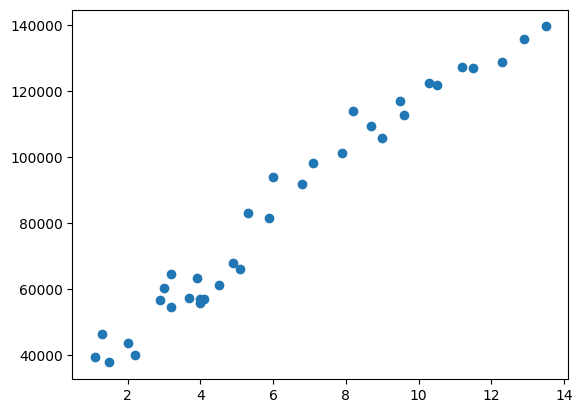

In [2]:
plt.scatter('YearsExperience','Salary',data=df)

In [3]:
pears_corr_coef = np.corrcoef(df.YearsExperience, df.Salary)
print(pears_corr_coef)

[[1.         0.98242725]
 [0.98242725 1.        ]]


In [4]:
X = df['YearsExperience']
Y = df['Salary']

In [5]:
X_train=X.sample(frac=0.8,random_state=200)
X_test=X.drop(X_train.index)
Y_train = Y.sample(frac=0.8,random_state=200)
Y_test = Y.drop(Y_train.index)

In [6]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

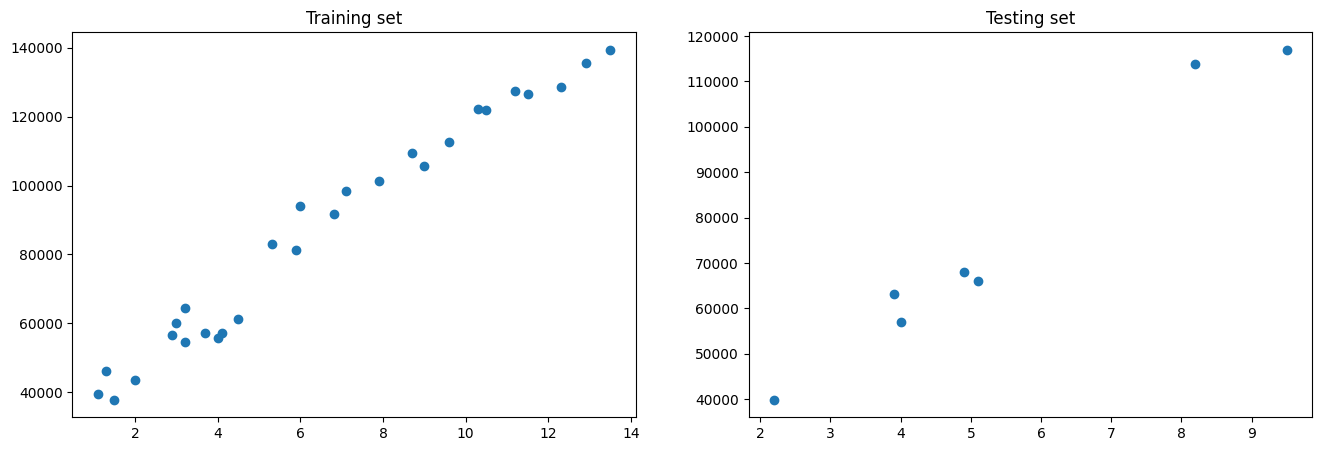

In [7]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.scatter(x=X_train,y=Y_train)
plt.title('Training set')


plt.subplot(1,2,2)
plt.scatter(x=X_test,y=Y_test)
plt.title('Testing set')
plt.show()

In [8]:
def linear_regression(X_train,Y_train,X_test,Y_test):
        # Calculate X and Y means
        X_mean = X_train.mean()
        Y_mean = Y_train.mean()

        # Calculate slope b
        b = sum((X_train-X_mean)*(Y_train-Y_mean)) / sum(((X_train - X_mean)**2))

        # Calculate intercept a
        a = (Y_mean - (b*X_mean))

        # Prediction on training data + MSE
        Y_pred_train = a + (b * X_train)
        training_error = sum((Y_train-Y_pred_train)**2)/len(Y_train)

        # Prediction on test data + MSE
        Y_pred_test = a + (b * X_test)
        test_error = sum((Y_test-Y_pred_test)**2)/len(Y_test)

        # Calculate R squared
        R2 = sum((Y_pred_train-Y_mean)**2)/sum((Y_train-Y_mean)**2)

        return a, b, training_error, test_error, R2

In [9]:
a, b, training_error, test_error, R2 = linear_regression(X_train,Y_train,X_test,Y_test)

In [10]:
print(f"Your LR equation is: Y = {a} + {b}*X")

Your LR equation is: Y = 30859.425217129494 + 8465.67264437363*X


In [11]:
print(f"Training MSE: {training_error}, Test MSE: {test_error}")

Training MSE: 28880833.65305715, Test MSE: 64532151.82760484


In [12]:
print(f"R squared: {R2}")

R squared: 0.9724676432658884


In [13]:
def salary_prediction(X):
        y = a + (b*X)
        return y

In [14]:
salary_prediction(5)

73187.78843899764